In [132]:
import cv2

In [133]:
import os
print(os.getcwd())


c:\Users\samir\GitHub\365DaysOfData\06-Convolutional-Neural-Network\code


In [134]:
image_path ='c:/Users/samir/GitHub//365DaysOfData/06-Convolutional-Neural-Network/images/girl.png'

In [135]:
image = cv2.imread(image_path)

In [136]:
image.shape

(512, 512, 3)

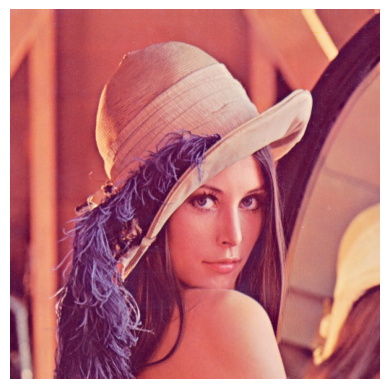

In [137]:
normalized_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
plt.imshow(cv2.cvtColor(normalized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

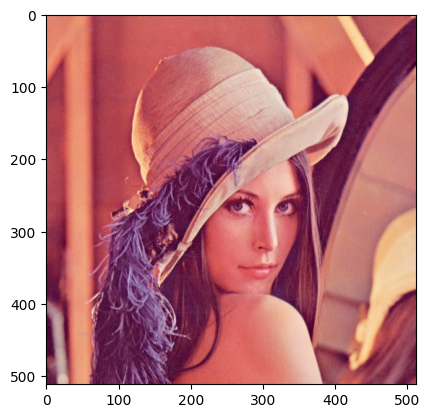

In [138]:
plt.imshow(image_rgb)

In [139]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [140]:
import matplotlib.pyplot as plt

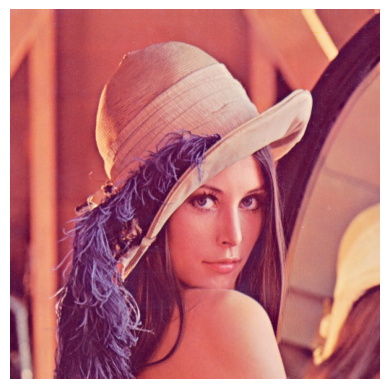

In [141]:
plt.imshow(image_rgb)
plt.axis('off')  # hide axis
plt.show()

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

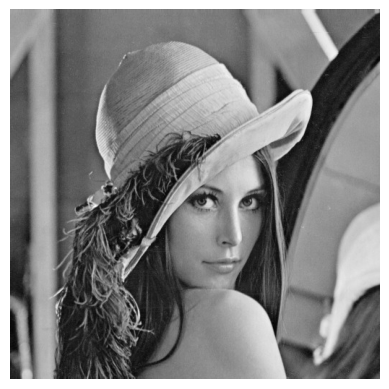

In [142]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

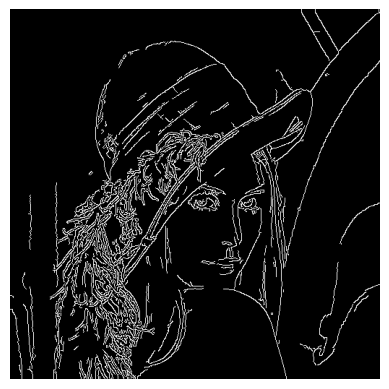

In [143]:
edges = cv2.Canny(image, 100, 200)

plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()


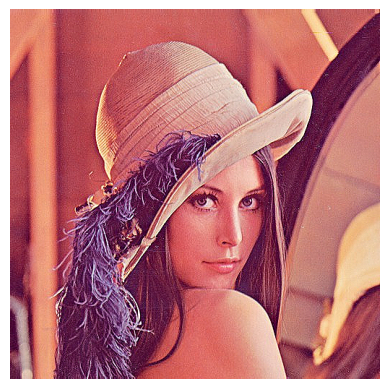

In [144]:
import numpy as np
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
sharpen = cv2.filter2D(image, -1, kernel)
plt.imshow(cv2.cvtColor(sharpen, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


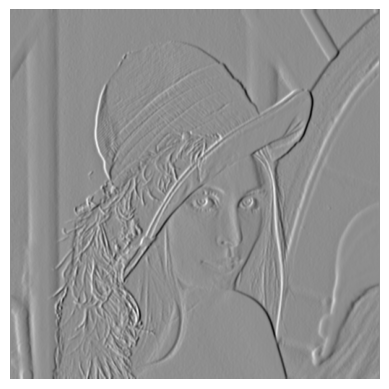

In [145]:
sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
plt.imshow(sobelx, cmap='gray')
plt.axis('off')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-8606.0..6623.0].


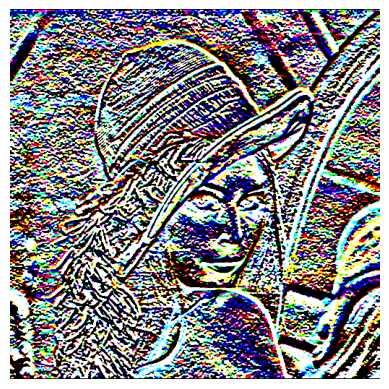

In [146]:
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
plt.imshow(sobely, cmap='gray')
plt.axis('off')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-260.0..191.0].


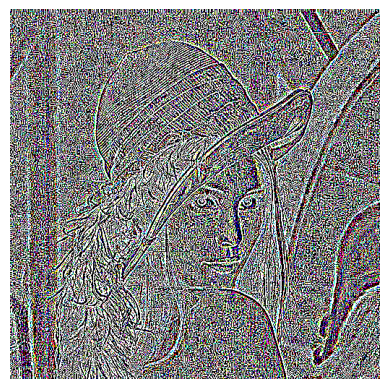

In [147]:
laplacian = cv2.Laplacian(image, cv2.CV_64F)
plt.imshow(laplacian, cmap='gray')
plt.axis('off')
plt.show()


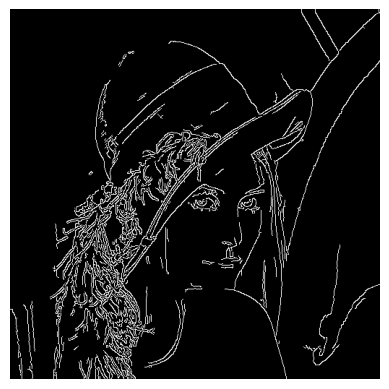

In [148]:
canny = cv2.Canny(gray_image, 100, 200)
plt.imshow(canny, cmap='gray')
plt.axis('off')
plt.show()


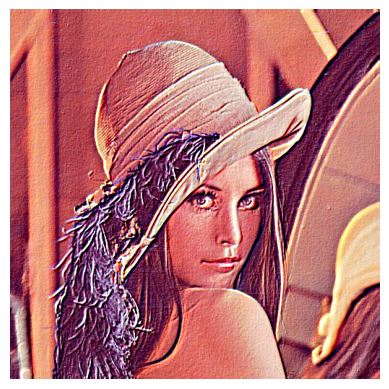

In [149]:
emboss_kernel = np.array([[-2, -1, 0], 
                          [-1, 1, 1], 
                          [0, 1, 2]])
emboss = cv2.filter2D(image, -1, emboss_kernel)
plt.imshow(cv2.cvtColor(emboss, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [150]:
import numpy as np

def convolve2d(image, kernel):
    # get dimensions
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # padding size (to keep output size the same)
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # pad the image with zeros
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    # output array
    new_image = np.zeros_like(image)

    # manual convolution
    for i in range(image_height):
        for j in range(image_width):
            # element-wise multiplication and summing
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            new_image[i, j] = np.sum(region * kernel)

    return new_image


In [151]:
def to_grayscale(image):
    return np.dot(image[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)


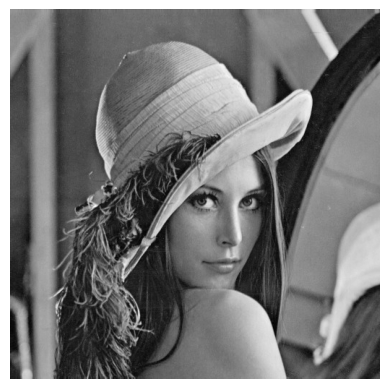

In [152]:
import matplotlib.pyplot as plt

plt.imshow(to_grayscale(image=image), cmap='gray')
plt.axis('off')
plt.show()


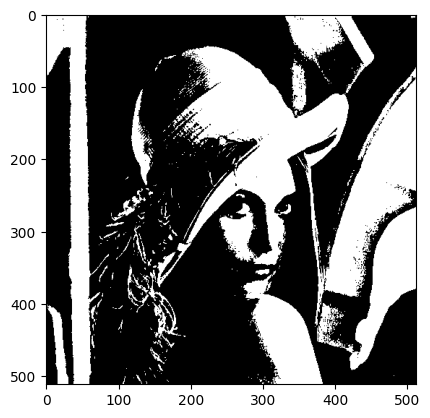

In [153]:
def binary_threshold(image, threshold=128):
    return np.where(image > threshold, 255, 0).astype(np.uint8)

binary_image = binary_threshold(to_grayscale(image))
plt.imshow(binary_image, cmap='gray')

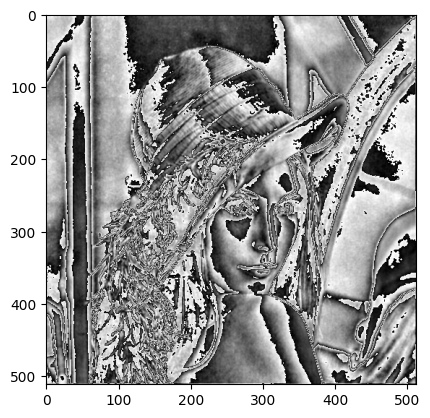

In [154]:
custom_blur_kernel = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])/3  # normalize

blurred_image = convolve2d(to_grayscale(image), custom_blur_kernel)
plt.imshow(blurred_image, cmap='gray')

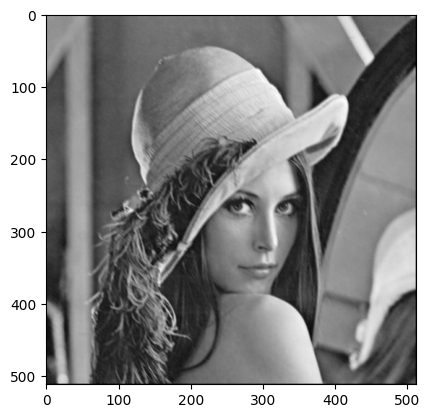

In [155]:
motion_blur_kernel = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
]) / 3

motion_blur = convolve2d(to_grayscale(image), motion_blur_kernel)
plt.imshow(motion_blur, cmap='gray')

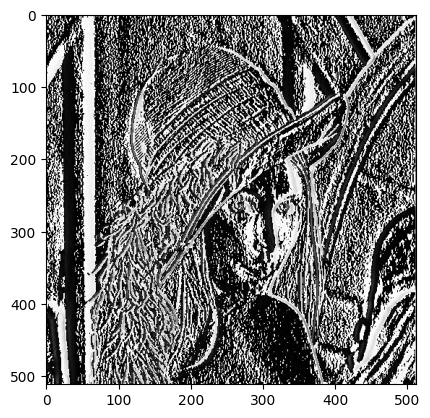

In [156]:
custom_edge_kernel = np.array([
    [-3, 0, 3],
    [-10, 0, 10],
    [-3, 0, 3]
]) /16

custom_edges = convolve2d(to_grayscale(image), custom_edge_kernel)
plt.imshow(custom_edges, cmap='gray')

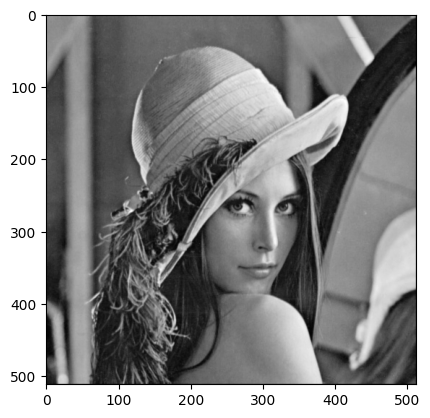

In [157]:
diamond_kernel = np.array([
    [0, 1, 0],
    [1, 4, 1],
    [0, 1, 0]
]) / 8

diamond_blur = convolve2d(to_grayscale(image), diamond_kernel)
plt.imshow(diamond_blur, cmap='gray')

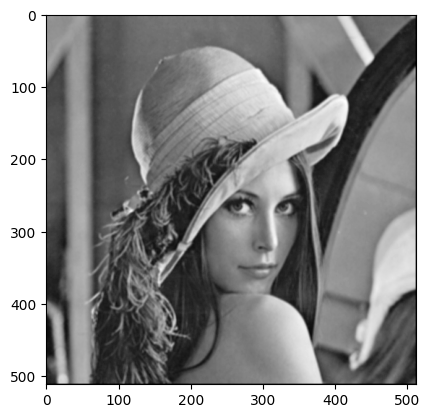

In [158]:
corner_blur_kernel = np.array([
    [2, 1, 2],
    [1, 1, 1],
    [2, 1, 2]
]) / 16

corner_blur = convolve2d(to_grayscale(image), corner_blur_kernel)
plt.imshow(corner_blur, cmap='gray')

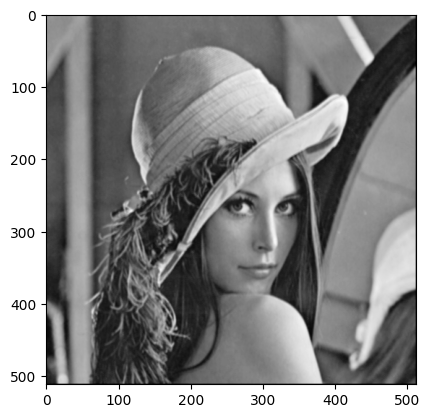

In [159]:
np.random.seed(42)  # for consistent chaos
random_blur_kernel = np.random.rand(3, 3)
random_blur_kernel /= np.sum(random_blur_kernel)  # normalize to prevent over-brightness

chaos_blur = convolve2d(to_grayscale(image), random_blur_kernel)
plt.imshow(chaos_blur, cmap='gray')

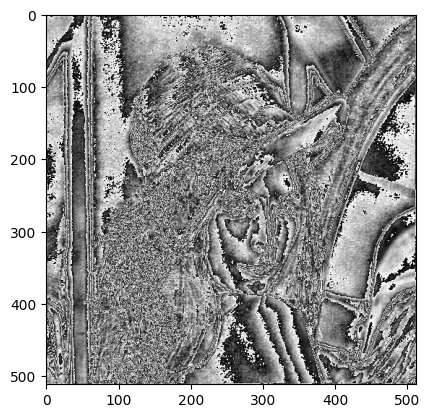

In [160]:
asymmetric_kernel = np.array([
    [-1, -2, 0],
    [0, 5, 2],
    [0, 2, 3]
])

asymmetric_sharpen = convolve2d(to_grayscale(image), asymmetric_kernel)
plt.imshow(asymmetric_sharpen, cmap='gray')

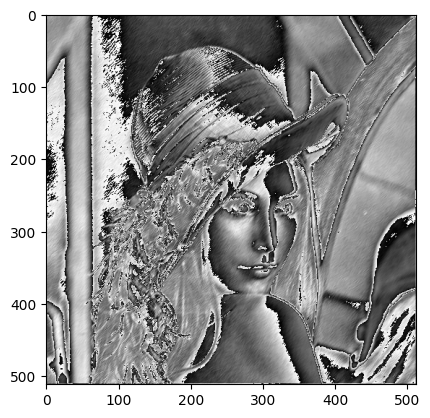

In [161]:
spiral_kernel = np.array([
    [0, -1, 2],
    [-1, 3, -1],
    [2, -1, 0]
])

spiral_image = convolve2d(to_grayscale(image), spiral_kernel)
plt.imshow(spiral_image, cmap='gray')

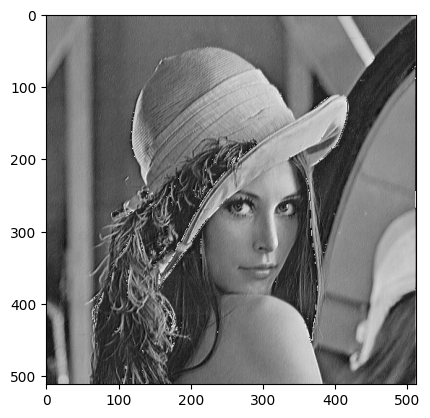

In [162]:
glitch_kernel = np.array([
    [0, np.random.choice([-1, 0, 1]), 0],
    [np.random.choice([-1, 0, 1]), 1, np.random.choice([-1, 0, 1])],
    [0, np.random.choice([-1, 0, 1]), 0]
])

glitch_image = convolve2d(to_grayscale(image), glitch_kernel)
plt.imshow(glitch_image, cmap='gray')

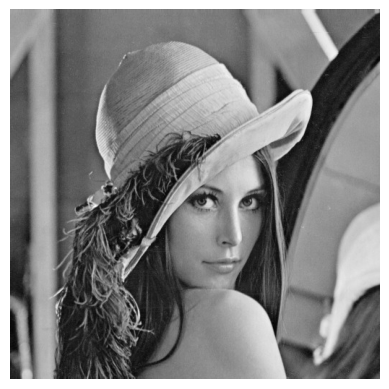

In [163]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()


In [165]:
# Load the pre-trained face detection classifier from OpenCV
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [167]:
# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

# Check if any faces are detected
if len(faces) == 0:
    print("No faces detected.")
else:
    print(f"{len(faces)} faces detected.")


1 faces detected.


In [176]:
# Draw rectangles around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(gray_image, (x, y), (x + w, y + h), (0, 255, 0), 2)


In [177]:
# Display the image with detected faces
cv2.imshow("Detected Faces", gray_image)

# Wait for a key press to close the window
cv2.waitKey(0)
cv2.destroyAllWindows()


### Webcam

In [183]:
# Capture video from webcam (0 is the default webcam)
cap = cv2.VideoCapture(0)

In [187]:
import cv2

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not access the camera.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture frame.")
        break

    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the grayscale frame
    cv2.imshow("Grayscale Video Feed", gray_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

In [188]:
import cv2

cap = cv2.VideoCapture("your_video.mp4")
# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Using XVID codec
out = cv2.VideoWriter('output_video.avi', fourcc, 20.0, (640, 480))  # Save at 20fps, 640x480 resolution

while True:
    ret, frame = cap.read()
    if not ret:
        print("End of video.")
        break

    # Convert frame to grayscale for processing
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply edge detection (as an example)
    edges = cv2.Canny(gray_frame, 100, 200)

    # Write the processed frame to the output file
    out.write(cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR))  # Convert edges back to BGR for saving

    # Display the edges
    cv2.imshow("Edge Processed Video", edges)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()


End of video.


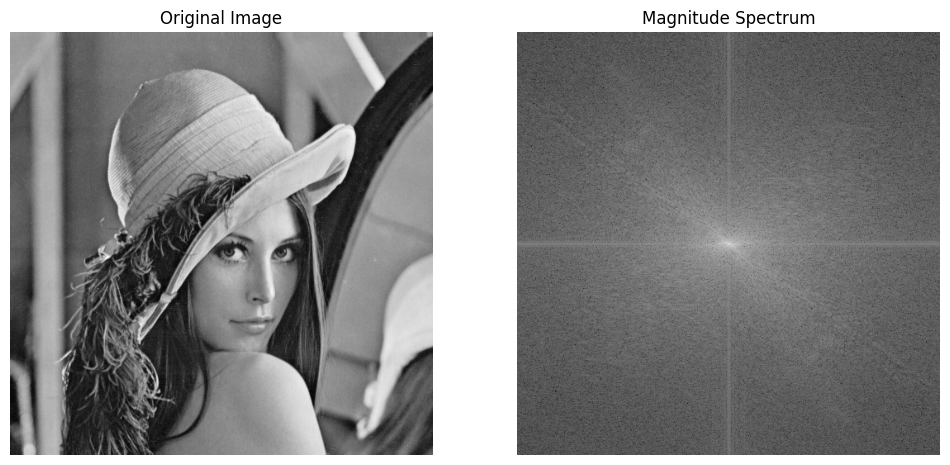

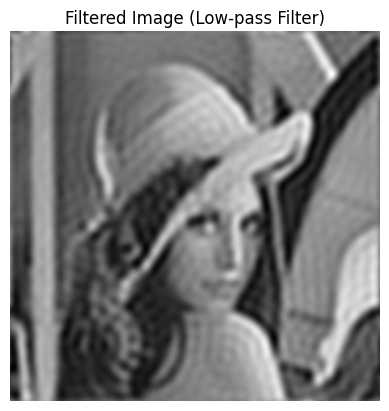

In [193]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the input image
image = cv2.imread('c:/Users/samir/GitHub//365DaysOfData/06-Convolutional-Neural-Network/images/girl.png', cv2.IMREAD_GRAYSCALE)  # read the image in grayscale mode

# Apply Fourier Transform using DFT (Discrete Fourier Transform)
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero frequency components to the center
dft_shift = np.fft.fftshift(dft)

# Calculate the magnitude spectrum (logarithmic scale for better visualization)
magnitude = cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])
magnitude = np.log(magnitude + 1)  # applying log for better visibility of frequencies

# Plotting the original image and the magnitude spectrum
plt.figure(figsize=(12, 6))

# Display original image
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Display magnitude spectrum
plt.subplot(122)
plt.imshow(magnitude, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis('off')

plt.show()

# OPTIONAL: Apply a low-pass filter in the frequency domain
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2  # center of the image

# Create a mask with a circle of ones in the center (low frequencies)
mask = np.zeros((rows, cols, 2), np.uint8)
radius = 30  # size of the low-pass filter region
center = [crow, ccol]

# Create a circular mask with high-pass filter (ones inside, zeros outside)
cv2.circle(mask, (center[1], center[0]), radius, (1, 1, 1), thickness=-1)

# Apply the mask to the DFT shifted
dft_shift = dft_shift * mask

# Inverse shift to return the zero frequency to the top-left
dft_ishift = np.fft.ifftshift(dft_shift)

# Inverse DFT to get the image back
img_back = cv2.idft(dft_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

# Display the filtered image
plt.imshow(img_back, cmap='gray')
plt.title("Filtered Image (Low-pass Filter)")
plt.axis('off')
plt.show()
